## Import tools

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use('ggplot')
plt.style.use('default')
import dateutil.parser
from datetime import datetime
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #2
  (fname, cnt))
/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1035: UserWarning: Duplicate key in file "/Users/zhizhou/.matplotlib/matplotlibrc", line #3
  (fname, cnt))


## import data

In [3]:
ms = pd.read_csv("massshooting.csv")
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 6 columns):
Incident Date     1067 non-null object
state             1067 non-null object
city or county    1067 non-null object
address           1048 non-null object
killed            1067 non-null int64
injured           1067 non-null int64
dtypes: int64(2), object(4)
memory usage: 50.1+ KB


In [7]:
state = pd.read_csv('state.csv')
pop_s = pd.read_csv('populationbystate.csv')

In [8]:
state_by_pop = pd.merge(left=state,right=pop_s, left_on='state', right_on='Geographic Area')

## clean data

In [6]:
def get_date(str_date):
    return datetime.strptime(str_date,'%d-%b-%y')
ms['date'] = ms['Incident Date'].apply(get_date)
ms.index=ms['date']
ms.head(2)

,Incident Date,state,city or county,address,killed,injured,date
date,,,,,,,
2016-07-24,24-Jul-16,Ohio,Hamilton,1555 Main St,1,7,2016-07-24
2016-07-24,24-Jul-16,Florida,Fort Myers,3580 Evans Ave,2,16,2016-07-24


In [9]:
state_by_pop.columns=['state','killed','injured','sum','geo','population2015']
def to_int(x):
    return int(x.replace(",",""))
state_by_pop['population2015'].apply(to_int)

0      4663111
1       732544
2      7495238
3      2968913
4     40123232
5      5049493
6      3635414
7       927400
8       506323
9     21204132
10    10230578
11    13097218
12     6517631
13     3026380
14     2852690
15     4351188
16     4673721
17     1388878
18     6208392
19     6758580
20    10599122
21     5668211
22     3014409
23     6069556
24      999489
25     1788508
26     3058190
27     9255769
28     2041539
29    19546699
30    10010770
31    11635446
32     3661694
33     4012924
34    12710938
35     1139543
36     4642137
37      796954
38     6502017
39    26585801
40     2783040
41      673169
42     8466864
43     6950610
44     1822758
45     5882760
Name: population2015, dtype: int64

In [10]:
state_by_pop['population']=state_by_pop['population2015'].apply(to_int)

## graphic

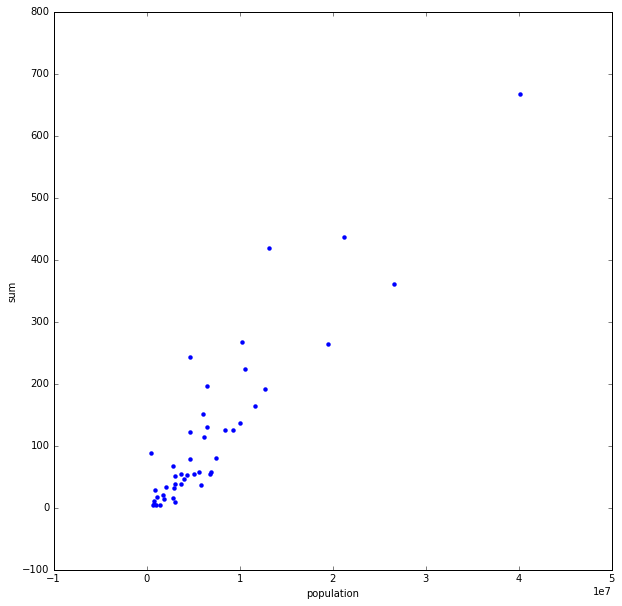

In [11]:
state_by_pop.plot(kind='scatter',x='population',y='sum',linewidth=0,figsize=[10,10])
# plt.savefig('scatter2.pdf',transparent=True)